In [358]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.svm import SVR

In [359]:
dataset = load_breast_cancer()
x = dataset.data
y = dataset.target

# scaling
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [360]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
dataset = pd.DataFrame(pd.read_csv(url))

x = dataset.drop(columns=['price','furnishingstatus'])

# variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# function to map yes/no to 1/0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# apply function to each variable in the list
x[varlist] = x[varlist].apply(binary_map)

y = dataset['price']

x.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,7420,4,2,3,1,0,0,0,1,2,1
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,1
4,7420,4,1,2,1,1,1,0,1,2,0


# SVR with no PCA

In [361]:
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

svr_lin = SVR(kernel='linear', C=1e3)
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

svr_lin.fit(x_train, y_train)
svr_rbf.fit(x_train, y_train)
svr_poly.fit(x_train, y_train)

y_pred_lin = svr_lin.predict(x_test)
y_pred_rbf = svr_rbf.predict(x_test)
y_pred_poly = svr_poly.predict(x_test)

In [362]:
print('MSE:')
print(f'Linear model: {mean_squared_error(y_test, y_pred_lin):e}')
print(f'RBF model: {mean_squared_error(y_test, y_pred_rbf):e}')
print(f'Polynomial model: {mean_squared_error(y_test, y_pred_poly):e}')

MSE:
Linear model: 2.054260e+12
RBF model: 3.629945e+12
Polynomial model: 3.349446e+12


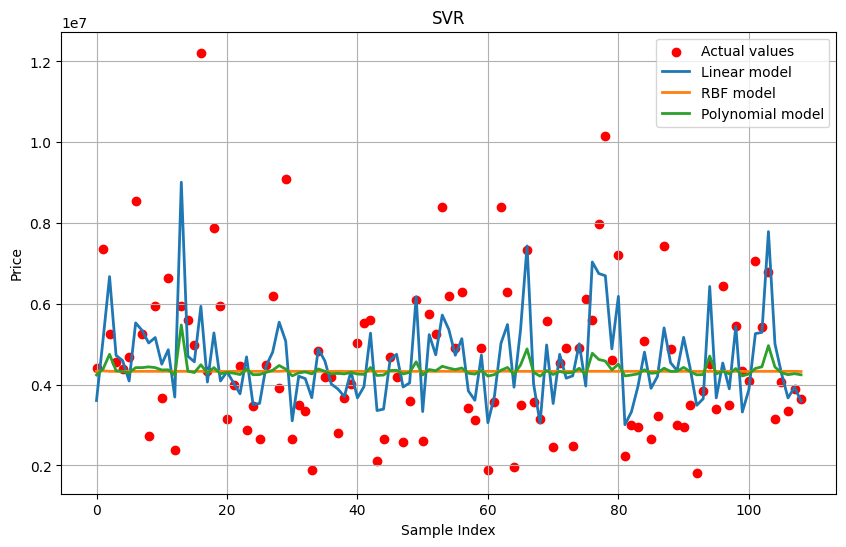

In [363]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='red', label='Actual values')
# plt.scatter(range(len(y_pred)), y_pred, color='blue', label='Predicted values')
plt.plot(range(len(y_test)), y_pred_lin, lw=2, label='Linear model')
plt.plot(range(len(y_test)), y_pred_rbf, lw=2, label='RBF model')
plt.plot(range(len(y_test)), y_pred_poly, lw=2, label='Polynomial model')
plt.title('SVR')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# SVR with PCA and linear kernelization

In [364]:
mse = []

for k in range(1,12):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  model = SVR(kernel='linear', C=1e3)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  mse.append(mean_squared_error(y_test, y_pred))


In [365]:
print(f'Best MSE: K={mse.index(min(mse))}: {min(mse):e}')

Best MSE: K=10: 2.056667e+12


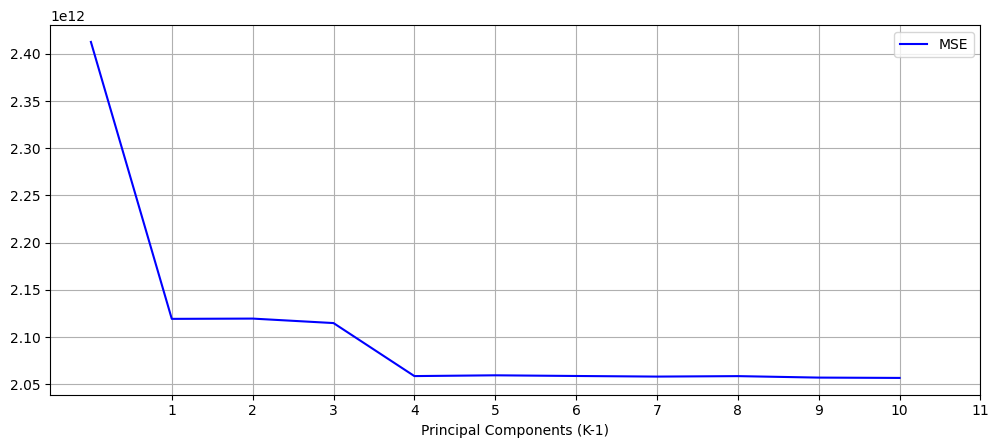

In [366]:
plt.plot(mse, label='MSE', color='blue')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,12))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

# SVR with PCA and RBF kernelization

In [367]:
mse = []

for k in range(1,12):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  model = SVR(kernel='rbf', C=1e3, gamma=0.1)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  mse.append(mean_squared_error(y_test, y_pred))

In [368]:
print(f'Best MSE: K={mse.index(min(mse))}: {min(mse):e}')

Best MSE: K=0: 3.628163e+12


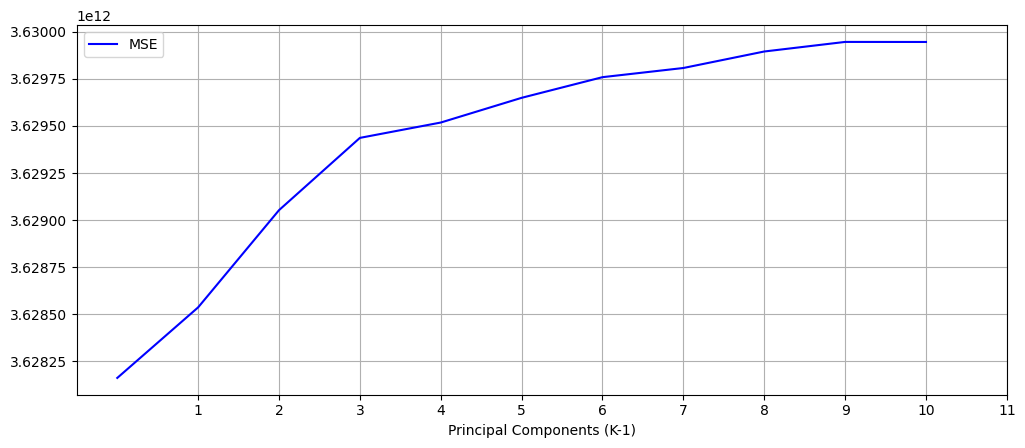

In [369]:
plt.plot(mse, label='MSE', color='blue')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,12))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()

# SVR with PCA and polynomial kernelization

In [370]:
mse = []

for k in range(1,12):
  pca = PCA(n_components=k)
  x_pca = pca.fit_transform(x)

  np.random.seed(0)
  x_train, x_test, y_train, y_test = train_test_split(x_pca, y, train_size = 0.8, test_size = 0.2, random_state = 100)

  model = SVR(kernel='poly', C=1e3, degree=2)
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  mse.append(mean_squared_error(y_test, y_pred))

In [371]:
print(f'Best MSE: K={mse.index(min(mse))}: {min(mse):e}')

Best MSE: K=0: 3.543295e+12


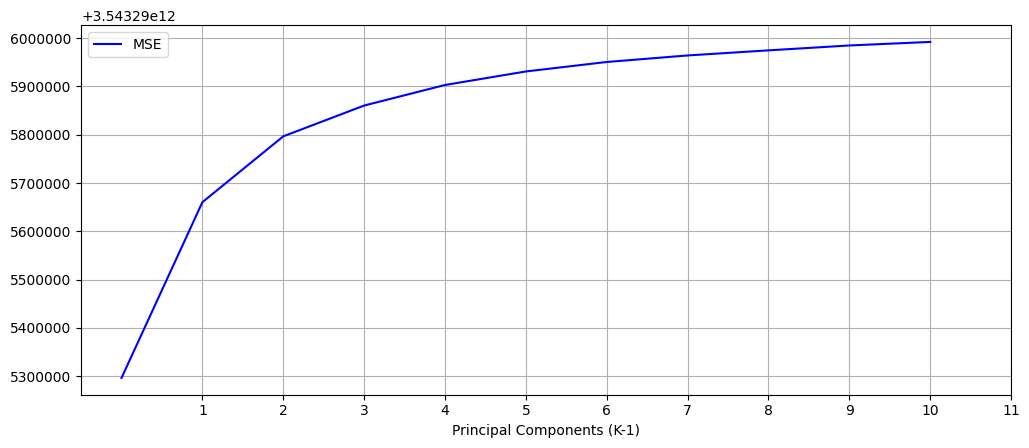

In [372]:
plt.plot(mse, label='MSE', color='blue')
plt.xlabel('Principal Components (K-1)')
plt.legend()
plt.xticks(range(1,12))
plt.grid(visible=True)
plt.gcf().set_size_inches(12, plt.gcf().get_size_inches()[1])
plt.show()